**Project Introduction: Predictive Modeling for Diabetes Detection**

This project focuses on leveraging machine learning techniques to develop a predictive model for the early detection of diabetes. Diabetes, a chronic medical condition characterized by elevated blood sugar levels, poses significant health risks and requires timely intervention for effective management. The objective of this project is to create a robust predictive model that can accurately identify individuals at risk of diabetes based on various health-related features.

The dataset employed in this study encompasses a diverse range of variables, including general health indicators, physical and mental health metrics, lifestyle factors, and demographic information. By utilizing advanced machine learning algorithms, such as Logistic Regression and Random Forest, the project aims to uncover patterns and relationships within the data that can contribute to the accurate prediction of diabetes status.

Key components of the project include:

1. **Data Exploration and Preprocessing:**
   - Thorough examination and preprocessing of the dataset to handle missing values, outliers, and categorical variables.
   - Exploration of key statistical insights and distributions within the dataset.

2. **Feature Engineering:**
   - Creation of meaningful features that capture relevant information and enhance the predictive power of the model.

3. **Model Selection and Tuning:**
   - Implementation of machine learning models, including Logistic Regression and Random Forest, known for their efficacy in binary classification tasks.
   - Hyperparameter tuning to optimize model performance and generalization.

4. **Model Evaluation:**
   - Rigorous evaluation of model performance using metrics such as accuracy, precision, recall, and F1 score.
   - Examination of confusion matrices to analyze the model's ability to correctly classify individuals with and without diabetes.


Through the culmination of these efforts, the project aims to contribute to the development of an accurate and reliable tool for diabetes risk assessment, facilitating early intervention and improved healthcare outcomes.

#### **Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
np.random.seed(0)

# Set the default figure size for the entire notebook
plt.rcParams['figure.figsize'] = (10, 6)

# importing warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

##### **Load the Dataset**

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Assuming df is your DataFrame
pd.set_option('display.max_columns', None)


In [ ]:
# Set the path to your data folder on Google Drive
data_path = '/content/drive/MyDrive/diabetes_project/diabetes.csv'

# list of selected columns to use for project
selected_columns = ['DIABETE3', '_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100', 'CVDSTRK3', '_MICHD', '_TOTINDA',
                     '_FRTLT1', '_VEGLT1', '_RFDRHV5', 'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK',
                     'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2']

# Load only the selected columns
df = pd.read_csv(data_path)
df = pd.read_csv(data_path, usecols=selected_columns)



Below are the description of the selected features used for this project

1. **GENHLTH:**
   - General health status.
   - Often self-reported by individuals, indicating how they perceive their overall health.

2. **PHYSHLTH:**
   - Physical health status.
   - Can represent the number of days individuals report having physical health issues or limitations.

3. **MENTHLTH:**
   - Mental health status.
   - Similar to PHYSHLTH but for mental health.

4. **HLTHPLN1:**
   - Health plan coverage.
   - Indicates whether individuals have health insurance coverage.

5. **MEDCOST:**
   - Medical care costs.
   - Can represent the affordability or accessibility of medical care.

6. **TOLDHI2:**
   - Ever told you have high blood pressure.
   - A binary indicator of whether individuals have been told they have high blood pressure.

7. **CVDSTRK3:**
   - Ever told you had a heart attack or a stroke.
   - A binary indicator of whether individuals have been told they had a heart attack or stroke.

8. **DIABETE3:**
   - Diabetes status.
   - Seems to be the target variable, with values indicating no diabetes, pre-diabetes, or diabetes.

9. **SEX:**
   - Gender or sex of individuals.
   - Often binary (e.g., 1 for male, 2 for female).

10. **EDUCA:**
    - Education level.
    - Represents the highest level of education attained by individuals.

11. **INCOME2:**
    - Household income.
    - Categorized income levels.

12. **DIFFWALK:**
    - Difficulty walking.
    - Indicates whether individuals report difficulty walking.

13. **SMOKE100:**
    - Smoking status.
    - A binary indicator of whether individuals have smoked 100 or more cigarettes in their lifetime.

14. **_RFHYPE5:**
    - High blood pressure risk factor.
    - Indicates risk factors related to high blood pressure.

15. **_CHOLCHK:**
    - Checked cholesterol in past 5 years.
    - Indicates whether individuals have had their cholesterol checked in the past 5 years.

16. **_MICHD:**
    - Coronary heart disease.
    - A binary indicator of whether individuals have been told they have coronary heart disease.

17. **_AGEG5YR:**
    - Age group in 5-year intervals.
    - Categorizes individuals into age groups.

18. **_BMI5:**
    - Body Mass Index.
    - Represents the body mass index of individuals.

19. **_RFDRHV5:**
    - Heavy drinking risk factor.
    - Indicates risk factors related to heavy drinking.

20. **_FRTLT1:**
    - Fruit consumption.
    - Indicates whether individuals consume fruits less than once per day.

21. **_VEGLT1:**
    - Vegetable consumption.
    - Indicates whether individuals consume vegetables less than once per day.

22. **_TOTINDA:**
    - Total physical activity.
    - Represents the total amount of physical activity individuals engage in.



In [ ]:
# showing the top 5 rows of data
df.head()

,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,MEDCOST,TOLDHI2,CVDSTRK3,DIABETE3,SEX,EDUCA,INCOME2,DIFFWALK,SMOKE100,_RFHYPE5,_CHOLCHK,_MICHD,_AGEG5YR,_BMI5,_RFDRHV5,_FRTLT1,_VEGLT1,_TOTINDA
0,5.0,15.0,18.0,1.0,2.0,1.0,2.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0,1.0,2.0,9.0,4018.0,1.0,2.0,1.0,2.0
1,3.0,88.0,88.0,2.0,1.0,2.0,2.0,3.0,2.0,6.0,1.0,2.0,1.0,1.0,2.0,2.0,7.0,2509.0,1.0,2.0,2.0,1.0
2,4.0,15.0,88.0,1.0,2.0,1.0,1.0,3.0,2.0,4.0,99.0,NaN,NaN,1.0,1.0,NaN,11.0,2204.0,9.0,9.0,9.0,9.0
3,5.0,30.0,30.0,1.0,1.0,1.0,2.0,3.0,2.0,4.0,8.0,1.0,2.0,2.0,1.0,2.0,9.0,2819.0,1.0,1.0,2.0,2.0
4,5.0,20.0,88.0,1.0,2.0,2.0,2.0,3.0,2.0,5.0,77.0,2.0,2.0,1.0,1.0,2.0,9.0,2437.0,1.0,9.0,1.0,2.0


**Data Exploration**

In [ ]:
# checking the shape of data
df.shape

(441456, 22)

In [ ]:
# checking the data type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441456 entries, 0 to 441455
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   441454 non-null  float64
 1   PHYSHLTH  441455 non-null  float64
 2   MENTHLTH  441456 non-null  float64
 3   HLTHPLN1  441456 non-null  float64
 4   MEDCOST   441455 non-null  float64
 5   TOLDHI2   382302 non-null  float64
 6   CVDSTRK3  441456 non-null  float64
 7   DIABETE3  441449 non-null  float64
 8   SEX       441456 non-null  float64
 9   EDUCA     441456 non-null  float64
 10  INCOME2   438155 non-null  float64
 11  DIFFWALK  429122 non-null  float64
 12  SMOKE100  427201 non-null  float64
 13  _RFHYPE5  441456 non-null  float64
 14  _CHOLCHK  441456 non-null  float64
 15  _MICHD    437514 non-null  float64
 16  _AGEG5YR  441456 non-null  float64
 17  _BMI5     405058 non-null  float64
 18  _RFDRHV5  441456 non-null  float64
 19  _FRTLT1   441456 non-null  float64
 20  _VEG

In [ ]:
# checking summary statistics
df.describe()

,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,MEDCOST,TOLDHI2,CVDSTRK3,DIABETE3,SEX,EDUCA,INCOME2,DIFFWALK,SMOKE100,_RFHYPE5,_CHOLCHK,_MICHD,_AGEG5YR,_BMI5,_RFDRHV5,_FRTLT1,_VEGLT1,_TOTINDA
count,441454.000000,441455.000000,441456.000000,441456.000000,441455.000000,382302.000000,441456.000000,441449.000000,441456.000000,441456.000000,438155.000000,429122.000000,427201.000000,441456.000000,441456.000000,437514.000000,441456.000000,405058.000000,441456.000000,441456.000000,441456.000000,441456.000000
mean,2.578790,60.655113,64.679178,1.101201,1.916066,1.630876,1.973880,2.757888,1.576542,4.920094,20.253013,1.856600,1.613987,1.428410,1.533609,1.911699,7.803623,2804.242400,1.516312,2.131746,2.109316,1.931871
std,1.117585,37.055684,35.843085,0.512261,0.415414,0.740235,0.348689,0.723319,0.494107,1.076198,31.853507,0.579838,0.746530,0.646749,1.555462,0.283733,3.495609,665.463433,1.874580,2.322882,2.522517,2.209728
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1202.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,15.000000,28.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,4.000000,5.000000,2.000000,1.000000,1.000000,1.000000,2.000000,5.000000,2373.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,88.000000,88.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,5.000000,7.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8.000000,2695.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,88.000000,88.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,8.000000,2.000000,2.000000,2.000000,1.000000,2.000000,10.000000,3090.000000,1.000000,2.000000,2.000000,2.000000
max,9.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,2.000000,14.000000,9995.000000,9.000000,9.000000,9.000000,9.000000


GENHLTH         2
PHYSHLTH        1
MENTHLTH        0
HLTHPLN1        0
MEDCOST         1
TOLDHI2     59154
CVDSTRK3        0
DIABETE3        7
SEX             0
EDUCA           0
INCOME2      3301
DIFFWALK    12334
SMOKE100    14255
_RFHYPE5        0
_CHOLCHK        0
_MICHD       3942
_AGEG5YR        0
_BMI5       36398
_RFDRHV5        0
_FRTLT1         0
_VEGLT1         0
_TOTINDA        0
dtype: int64


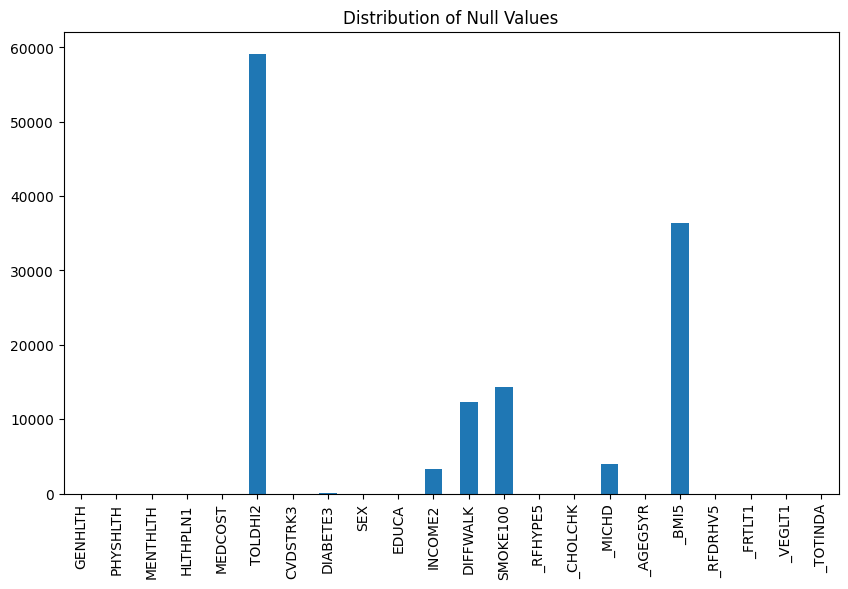

In [ ]:
print(df.isnull().sum())

# displaying null values using a barplot
df.isnull().sum().plot(kind = 'bar')
plt.title('Distribution of Null Values')
plt.show()

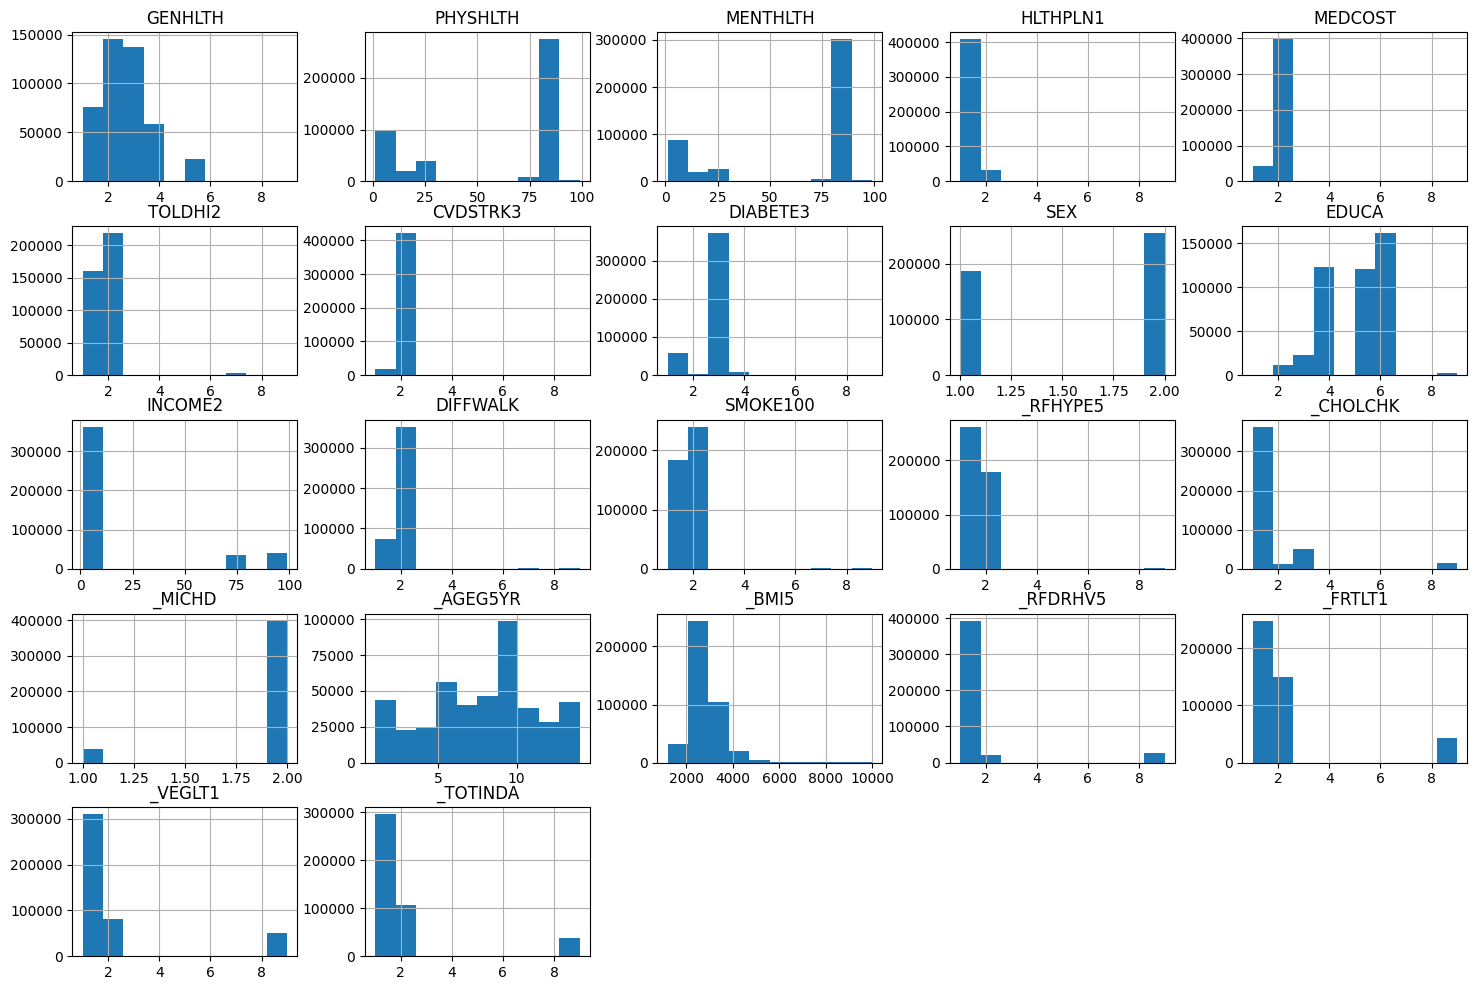

In [ ]:
#plot histograms for all numerical columns in the DataFrame
fig, ax = plt.subplots(figsize=(18, 12))
df.hist(ax=ax)
plt.show()


### **Cleaning The Data**

In [ ]:
#Drop Missing Values - knocks 100,000 rows out right away
df = df.dropna()
df.shape

(343606, 22)

In [ ]:
# DIABETE3
# going to make this ordinal. 0 is for no diabetes or only during pregnancy, 1 is for pre-diabetes or borderline diabetes, 2 is for yes diabetes
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['DIABETE3'] = df['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
df = df[df.DIABETE3 != 7]
df = df[df.DIABETE3 != 9]
df.DIABETE3.unique()

array([0., 2., 1.])

In [ ]:
#1 _RFHYPE5
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
df['_RFHYPE5'] = df['_RFHYPE5'].replace({1:0, 2:1})
df = df[df._RFHYPE5 != 9]
df._RFHYPE5.unique()

array([1., 0.])

In [ ]:
#2 TOLDHI2
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['TOLDHI2'] = df['TOLDHI2'].replace({2:0})
df = df[df.TOLDHI2 != 7]
df = df[df.TOLDHI2 != 9]
df.TOLDHI2.unique()

array([1., 0.])

In [ ]:
#3 _CHOLCHK
# Change 3 to 0 and 2 to 0 for Not checked cholesterol in past 5 years
# Remove 9
df['_CHOLCHK'] = df['_CHOLCHK'].replace({3:0,2:0})
df = df[df._CHOLCHK != 9]
df._CHOLCHK.unique()

array([1., 0.])

In [ ]:
#5 SMOKE100
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['SMOKE100'] = df['SMOKE100'].replace({2:0})
df = df[df.SMOKE100 != 7]
df = df[df.SMOKE100 != 9]
df.SMOKE100.unique()

array([1., 0.])

In [ ]:
#6 CVDSTRK3
# Change 2 to 0 because it is No
# Remove all 7 (dont knows)
# Remove all 9 (refused)
df['CVDSTRK3'] = df['CVDSTRK3'].replace({2:0})
df = df[df.CVDSTRK3 != 7]
df = df[df.CVDSTRK3 != 9]
df.CVDSTRK3.unique()

array([0., 1.])

In [ ]:
#7 _MICHD
#Change 2 to 0 because this means did not have MI or CHD
df['_MICHD'] = df['_MICHD'].replace({2: 0})
df._MICHD.unique()

array([0., 1.])

In [ ]:
#8 _TOTINDA
# 1 for physical activity
# change 2 to 0 for no physical activity
# Remove all 9 (don't know/refused)
df['_TOTINDA'] = df['_TOTINDA'].replace({2:0})
df = df[df._TOTINDA != 9]
df._TOTINDA.unique()

array([0., 1.])

In [ ]:
#9 _FRTLT1
# Change 2 to 0. this means no fruit consumed per day. 1 will mean consumed 1 or more pieces of fruit per day
# remove all dont knows and missing 9
df['_FRTLT1'] = df['_FRTLT1'].replace({2:0})
df = df[df._FRTLT1 != 9]
df._FRTLT1.unique()

array([0., 1.])

In [ ]:
#10 _VEGLT1
# Change 2 to 0. this means no vegetables consumed per day. 1 will mean consumed 1 or more pieces of vegetable per day
# remove all dont knows and missing 9
df['_VEGLT1'] = df['_VEGLT1'].replace({2:0})
df = df[df._VEGLT1 != 9]
df._VEGLT1.unique()

array([1., 0.])

In [ ]:
#11 _RFDRHV5
# Change 1 to 0 (1 was no for heavy drinking). change all 2 to 1 (2 was yes for heavy drinking)
# remove all dont knows and missing 9
df['_RFDRHV5'] = df['_RFDRHV5'].replace({1:0, 2:1})
df = df[df._RFDRHV5 != 9]
df._RFDRHV5.unique()

array([0., 1.])

In [ ]:
#12 HLTHPLN1
# 1 is yes, change 2 to 0 because it is No health care access
# remove 7 and 9 for don't know or refused
df['HLTHPLN1'] = df['HLTHPLN1'].replace({2:0})
df = df[df.HLTHPLN1 != 7]
df = df[df.HLTHPLN1 != 9]
df.HLTHPLN1.unique()

array([1., 0.])

In [ ]:
#13 MEDCOST
# Change 2 to 0 for no, 1 is already yes
# remove 7 for don/t know and 9 for refused
df['MEDCOST'] = df['MEDCOST'].replace({2:0})
df = df[df.MEDCOST != 7]
df = df[df.MEDCOST != 9]
df.MEDCOST.unique()

array([0., 1.])

In [ ]:
#14 GENHLTH
# This is an ordinal variable that I want to keep (1 is Excellent -> 5 is Poor)
# Remove 7 and 9 for don't know and refused
df = df[df.GENHLTH != 7]
df = df[df.GENHLTH != 9]
df.GENHLTH.unique()

array([5., 3., 2., 4., 1.])

In [ ]:
#15 MENTHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df['MENTHLTH'] = df['MENTHLTH'].replace({88:0})
df = df[df.MENTHLTH != 77]
df = df[df.MENTHLTH != 99]
df.MENTHLTH.unique()

array([18.,  0., 30.,  3.,  5., 15., 10.,  6., 20.,  2., 25.,  1., 29.,
        4.,  7.,  8., 21., 14., 26.,  9., 16., 28., 11., 12., 24., 17.,
       13., 23., 27., 19., 22.])

In [ ]:
#16 PHYSHLTH
# already in days so keep that, scale will be 0-30
# change 88 to 0 because it means none (no bad mental health days)
# remove 77 and 99 for don't know not sure and refused
df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0})
df = df[df.PHYSHLTH != 77]
df = df[df.PHYSHLTH != 99]
df.PHYSHLTH.unique()

array([15.,  0., 30.,  2., 14., 28.,  7., 20.,  3., 10.,  1.,  5., 17.,
        4., 19.,  6., 21., 12.,  8., 25., 27., 22., 29., 24.,  9., 16.,
       18., 23., 13., 26., 11.])

In [ ]:
#17 DIFFWALK
# change 2 to 0 for no. 1 is already yes
# remove 7 and 9 for don't know not sure and refused
df['DIFFWALK'] = df['DIFFWALK'].replace({2:0})
df = df[df.DIFFWALK != 7]
df = df[df.DIFFWALK != 9]
df.DIFFWALK.unique()

array([1., 0.])

In [ ]:
#19 _AGEG5YR
# already ordinal. 1 is 18-24 all the way up to 13 wis 80 and older. 5 year increments.
# remove 14 because it is don't know or missing
df = df[df._AGEG5YR != 14]
df._AGEG5YR.unique()

array([ 9.,  7., 11., 10., 13.,  8.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [ ]:
#20 EDUCA
# This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more
# Scale here is 1-6
# Remove 9 for refused:
df = df[df.EDUCA != 9]
df.EDUCA.unique()

array([4., 6., 3., 5., 2., 1.])

In [ ]:
#21 INCOME2
# Variable is already ordinal with 1 being less than $10,000 all the way up to 8 being $75,000 or more
# Remove 77 and 99 for don't know and refused
df = df[df.INCOME2 != 77]
df = df[df.INCOME2 != 99]
df.INCOME2.unique()

array([3., 1., 8., 6., 4., 7., 2., 5.])

In [ ]:
#Check the shape of the dataset now: We have 253,680 cleaned rows and 22 columns (1 of which is our dependent variable)
df.shape

(253680, 22)

In [ ]:
#Check Class Sizes of the heart disease column
df.groupby(['DIABETE3']).size()

DIABETE3
0.0    213703
1.0      4631
2.0     35346
dtype: int64

Below is the description for the Diabetes column

- **0:** 213,703 occurrences
  - This represents the category where individuals don't have diabetes or have had diabetes only during pregnancy.

- **1.0:** 4,631 occurrences
  - This represents the category indicating pre-diabetes or borderline diabetes.

- **2.0:** 35,346 occurrences
  - This represents the category where individuals have confirmed diabetes.

In summary, the 'DIABETE3' column seems to have three unique values (0.0, 1.0, 2.0), and the count next to each value indicates how many times that value appears in the dataset.




In [ ]:
# making the feature names more readable
df = df.rename(columns = {'DIABETE3':'Diabetes_012',
                                         '_RFHYPE5':'HighBP',
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck',
                                         '_BMI5':'BMI',
                                         'SMOKE100':'Smoker',
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack',
                                         '_TOTINDA':'PhysActivity',
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies",
                                         '_RFDRHV5':'HvyAlcoholConsump',
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocbcCost',
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysHlth', 'DIFFWALK':'DiffWalk',
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

df.columns

Index(['GenHlth', 'PhysHlth', 'MentHlth', 'AnyHealthcare', 'NoDocbcCost',
       'HighChol', 'Stroke', 'Diabetes_012', 'Sex', 'Education', 'Income',
       'DiffWalk', 'Smoker', 'HighBP', 'CholCheck', 'HeartDiseaseorAttack',
       'Age', 'BMI', 'HvyAlcoholConsump', 'Fruits', 'Veggies', 'PhysActivity'],
      dtype='object')

##### **Creating a Binary Dataset for "diabetes" vs "no diabetes"**

If we want to do binary classification of diabtes vs no diabetes that can be accomplished by either joining the prediabetics with the diabetics, with the non-diabetics, or removing them entirely. I would like to add them to the diabetic group, as being told by a doctor you are prediabetic is an indication of diabetes risk and ultimately we are interested in risk.
While we're at it, we can make the dataset balanced in a 50-50 split of non-diabetics to diabetics and prediabetics. There are a sufficient number of records to do this randomly and yield predictive results. There are 4631 (pre-diabetes) + 35346 (diabetes) so we can make a new 50-50 binary dataset of 39,977 diabetic risk individuals to 39,977 randomly selected non-diabetics.
Note that because it is a survey it is always possible (actually likely) that some individuals will not have been diagnosed yet but are either pre-diabetic or diabetic.

In [ ]:
#Change the diabetics 2 to a 1 and pre-diabetics 1 to a 0, so that we have 0 meaning non-diabetic and pre-diabetic and 1 meaning diabetic.
df['Diabetes_012'] = df['Diabetes_012'].replace({1:0})
df['Diabetes_012'] = df['Diabetes_012'].replace({2:1})

#Change the column name to Diabetes_binary
df = df.rename(columns = {'Diabetes_012': 'Diabetes_binary'})
# printing the newly created diabetes column
df.Diabetes_binary.value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

### **Sampling the Diabetes Feature**
In the provided code snippet, it's evident that the diabetes feature, intended as the dependent variable, exhibits imbalance, which may adversely impact the model. To address this issue, I will employ downsampling to create a more balanced dataset for model training.

This process entails randomly selecting records from the minority class, thereby reducing the class imbalance and enhancing the model's ability to learn patterns effectively.

In [ ]:
df.head()

,GenHlth,PhysHlth,MentHlth,AnyHealthcare,NoDocbcCost,HighChol,Stroke,Diabetes_binary,Sex,Education,Income,DiffWalk,Smoker,HighBP,CholCheck,HeartDiseaseorAttack,Age,BMI,HvyAlcoholConsump,Fruits,Veggies,PhysActivity
0,5.0,15.0,18.0,1.0,0.0,1.0,0.0,0.0,2.0,4.0,3.0,1.0,1.0,1.0,1.0,0.0,9.0,4018.0,0.0,0.0,1.0,0.0
1,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,2509.0,0.0,0.0,0.0,1.0
3,5.0,30.0,30.0,1.0,1.0,1.0,0.0,0.0,2.0,4.0,8.0,1.0,0.0,1.0,1.0,0.0,9.0,2819.0,0.0,1.0,0.0,0.0
5,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,6.0,0.0,0.0,1.0,1.0,0.0,11.0,2652.0,0.0,1.0,1.0,1.0
6,2.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,5.0,4.0,0.0,0.0,1.0,1.0,0.0,11.0,2389.0,0.0,1.0,1.0,1.0


In [ ]:
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = df['Diabetes_binary'] == 1
df_1 = df[is1]

#Get the 0s
is0 = df['Diabetes_binary'] == 0
df_0 = df[is0]

#Select the 39977 random cases from the 0 (non-diabetes group). we already have 35346 cases from the diabetes risk group
df_0_rand1 = df_0.take(np.random.permutation(len(df_0))[:35346])

#Append the 39977 1s to the 39977 randomly selected 0s
df = df_0_rand1.append(df_1, ignore_index = True)

#See the classes are perfectly balanced now
df.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    35346
1.0    35346
dtype: int64

## **Exploratory Data Analysis**

In [ ]:
# checking the datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GenHlth               70692 non-null  float64
 1   PhysHlth              70692 non-null  float64
 2   MentHlth              70692 non-null  float64
 3   AnyHealthcare         70692 non-null  float64
 4   NoDocbcCost           70692 non-null  float64
 5   HighChol              70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   Diabetes_binary       70692 non-null  float64
 8   Sex                   70692 non-null  float64
 9   Education             70692 non-null  float64
 10  Income                70692 non-null  float64
 11  DiffWalk              70692 non-null  float64
 12  Smoker                70692 non-null  float64
 13  HighBP                70692 non-null  float64
 14  CholCheck             70692 non-null  float64
 15  HeartDiseaseorAttac

In [ ]:
# checking the summary stats of the data
df.describe()

,GenHlth,PhysHlth,MentHlth,AnyHealthcare,NoDocbcCost,HighChol,Stroke,Diabetes_binary,Sex,Education,Income,DiffWalk,Smoker,HighBP,CholCheck,HeartDiseaseorAttack,Age,BMI,HvyAlcoholConsump,Fruits,Veggies,PhysActivity
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,2.840222,5.783483,3.736462,0.953672,0.093929,0.527924,0.062794,0.500000,1.544234,4.922509,5.699287,0.253197,0.475542,0.564307,0.975471,0.148914,8.605797,2989.472868,0.043626,0.615034,0.789156,0.703149
std,1.111859,10.039272,8.130769,0.210195,0.291731,0.499223,0.242593,0.500004,0.498043,1.028952,2.171286,0.434846,0.499405,0.495851,0.154686,0.356006,2.852992,712.735326,0.204263,0.486591,0.407911,0.456874
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1263.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,2509.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,2.000000,5.000000,6.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,2870.000000,0.000000,1.000000,1.000000,1.000000
75%,4.000000,5.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,3325.000000,0.000000,1.000000,1.000000,1.000000
max,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,9765.000000,1.000000,1.000000,1.000000,1.000000


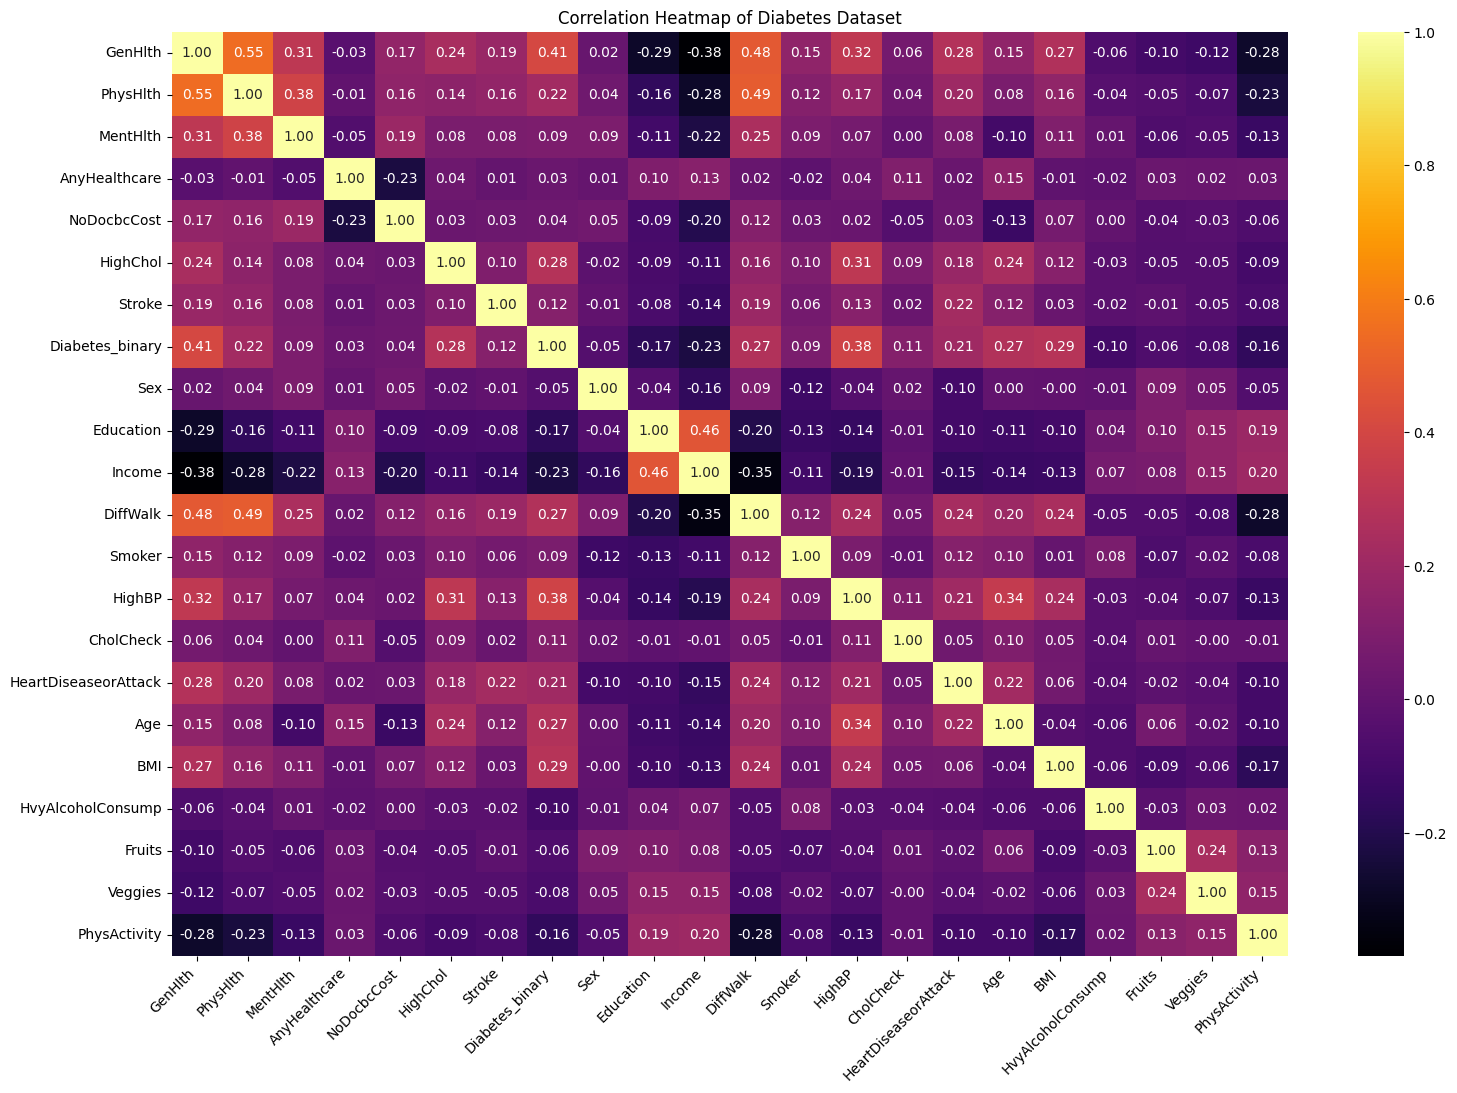

In [ ]:
# Find the correlation Co-efficient
df_corr = df.corr()

# Setting the matplotlib figure
plt.figure(figsize=(18, 12))

# Drawing the heatmap
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='inferno')

# Adjusting layout for better visibility
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Diabetes Dataset')

# Show the plot
plt.show()

The correlation heatmap provides insights into the relationships between different variables in your dataset. Here are some key observations:

1. **Positive Correlations:**
   - There is a strong positive correlation (around 0.55) between the 'GenHlth' (General Health) and 'PhysHlth' (Physical Health) columns.
   - The 'GenHlth' column also shows a moderate positive correlation with 'MentHlth' (Mental Health) and 'Diabetes_binary.'

2. **Negative Correlations:**
   - The 'Education' and 'Income' columns exhibit strong negative correlations with 'GenHlth,' indicating that individuals with higher education or income tend to report better general health.
   - 'Education' and 'Income' also show negative correlations with 'PhysHlth,' suggesting similar trends for physical health.
   - 'Diabetes_binary' has a negative correlation with 'Education' and 'Income,' indicating that individuals with higher education or income are less likely to have diabetes.

3. **Moderate Correlations:**
   - 'DiffWalk' (Difficulty Walking) has a strong positive correlation with 'GenHlth' and 'PhysHlth,' indicating that individuals who report difficulty walking tend to have lower general and physical health.
   - 'Smoker' shows a positive correlation with 'HighBP' (High Blood Pressure), 'CholCheck' (Cholesterol Check), and 'HeartDiseaseorAttack,' indicating associations between smoking and these health factors.

4. **Other Insights:**
   - Some features, such as 'Sex,' 'Age,' 'BMI' (Body Mass Index), and 'Fruits,' show varying degrees of correlation with other variables.

It's important to note that correlation does not imply causation, and further analysis or domain expertise may be required to interpret the relationships accurately. Additionally, high correlations suggest associations but do not guarantee predictive power in a machine learning context.

**BMI**

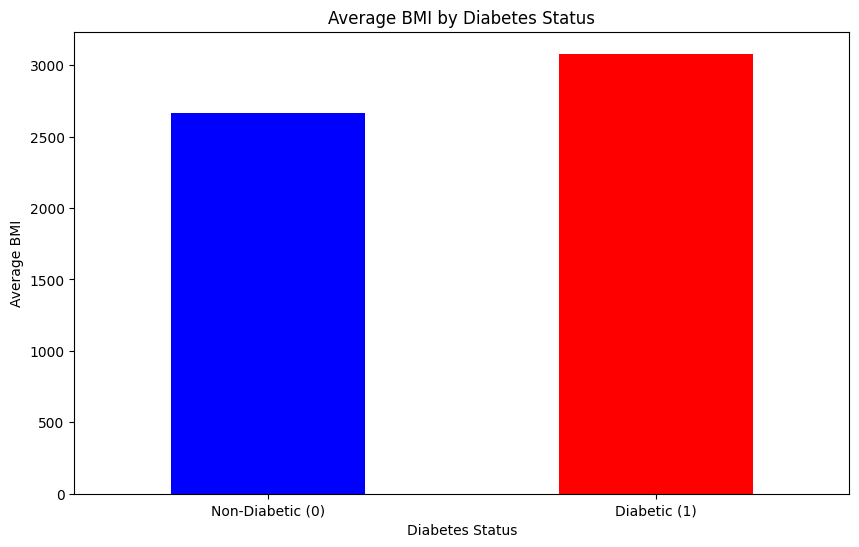

In [ ]:
# Calculate the mean BMI for each diabetes status group
mean_bmi_by_diabetes_status = df.groupby('Diabetes_binary')['BMI'].median()

# Create a bar plot for the mean BMI vs Diabetes Status
mean_bmi_by_diabetes_status.plot(kind='bar', color=['blue', 'red'])
plt.title('Average BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Average BMI')
plt.xticks([0, 1], ['Non-Diabetic (0)', 'Diabetic (1)'], rotation=0)
plt.show()

The plot indicates that, on average, individuals with diabetes exhibit a higher BMI compared to those without diabetes.

#### **Gender vs Diabetes**

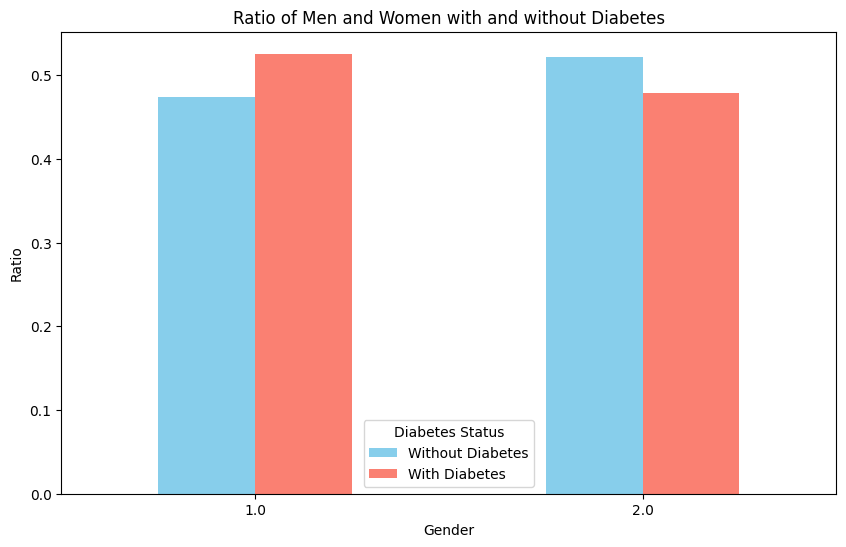

In [ ]:
# Calculating the number of men and women with and without diabetes
diabetes_gender_counts = df.groupby(['Sex', 'Diabetes_binary']).size().unstack()

# Calculate the ratio of men and women with and without diabetes
diabetes_gender_ratios = diabetes_gender_counts.div(diabetes_gender_counts.sum(axis=1), axis=0)

# Plotting the ratios
plt.figure(figsize=(10, 6))
diabetes_gender_ratios.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Ratio of Men and Women with and without Diabetes')
plt.xlabel('Gender')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.legend(['Without Diabetes', 'With Diabetes'], title='Diabetes Status')
plt.show()


**Insights from Gender and Diabetes Ratio Analysis:**

The analysis of the ratio of diabetes status among different genders reveals interesting patterns:

1. **Men (Sex = 1.0):**
   - Approximately 47.4% of men do not have diabetes (Diabetes_binary = 0.0), while 52.6% have diabetes (Diabetes_binary = 1.0). This indicates a slightly higher prevalence of diabetes among men.

2. **Women (Sex = 2.0):**
   - For women, the majority (approximately 52.1%) do not have diabetes, whereas around 47.9% have diabetes. This suggests a relatively balanced distribution of diabetes status among women.

Based on the provided ratios, it can be inferred that, on average, men are slightly more likely to be diabetic compared to women. Specifically:

Among men (Sex = 1.0), the ratio of individuals with diabetes (Diabetes_binary = 1.0) is 52.6%, which is slightly higher than the ratio for women (47.9%).

This suggests a modest gender difference in the prevalence of diabetes, with men showing a slightly higher likelihood of being diabetic compared to women, according to the provided data.

##### **High Blood Pressure vs Diabetes Status**

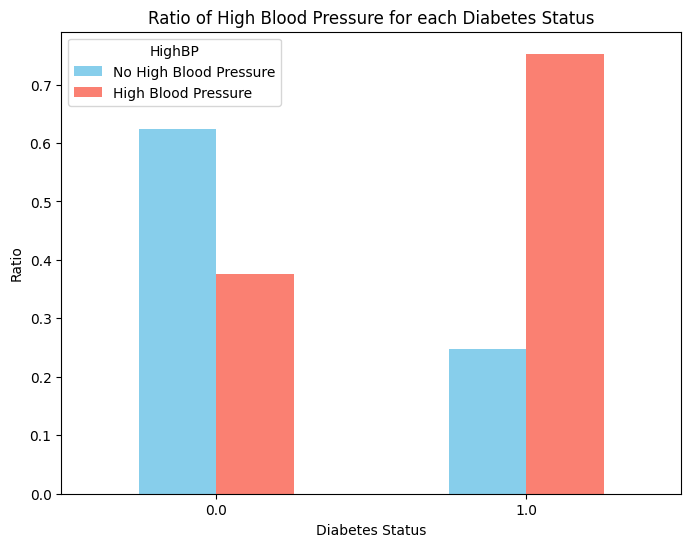

In [ ]:
# Calculate the ratio of HighBP for each Diabetes status
highbp_diabetes_ratios = df.groupby(['Diabetes_binary', 'HighBP']).size().unstack().div(df['Diabetes_binary'].value_counts(), axis=0)

# Plotting the ratios
plt.figure(figsize=(8, 6))
highbp_diabetes_ratios.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Ratio of High Blood Pressure for each Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.legend(['No High Blood Pressure', 'High Blood Pressure'], title='HighBP', loc='upper left')
plt.show()


**Insights from High Blood Pressure (HighBP) and Diabetes Ratio Analysis:**

The analysis of the ratio of High Blood Pressure (HighBP) among individuals with and without diabetes reveals significant insights:

1. **No Diabetes (Diabetes_binary = 0.0):**
   - Among individuals without diabetes, approximately 62.4% do not have High Blood Pressure (HighBP = 0.0), while 37.6% have High Blood Pressure (HighBP = 1.0).

2. **Diabetes Present (Diabetes_binary = 1.0):**
   - In contrast, among individuals with diabetes, only around 24.7% do not have High Blood Pressure, while a substantial 75.3% have High Blood Pressure.

**Key Observations:**
- There is a notable association between diabetes and the presence of High Blood Pressure.
- Individuals with diabetes are significantly more likely to have High Blood Pressure compared to those without diabetes.
- The majority of individuals without diabetes do not have High Blood Pressure.


##### **High Cholesterol vs Diabetes Status**

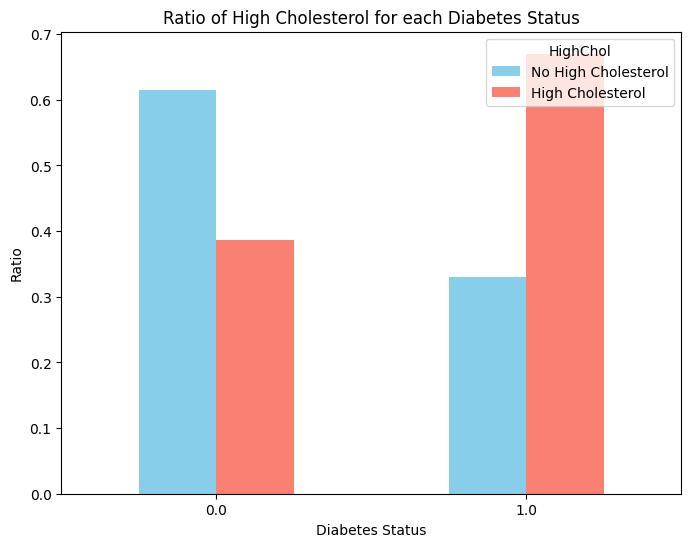

In [ ]:
# Calculate the ratio of HighChol for each Diabetes status
highchol_diabetes_ratios = df.groupby(['Diabetes_binary', 'HighChol']).size().unstack().div(df['Diabetes_binary'].value_counts(), axis=0)

# Plotting the ratios
plt.figure(figsize=(8, 6))
highchol_diabetes_ratios.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Ratio of High Cholesterol for each Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.legend(['No High Cholesterol', 'High Cholesterol'], title='HighChol', loc='upper right')
plt.show()

**Insights from High Cholesterol (HighChol) and Diabetes Ratio Analysis:**

The ratio analysis of High Cholesterol (HighChol) in relation to diabetes status provides noteworthy insights:

1. **No Diabetes (Diabetes_binary = 0.0):**
   - Approximately 62.3% of individuals without diabetes do not have High Cholesterol (HighChol = 0.0), while 37.7% have High Cholesterol (HighChol = 1.0).

2. **Diabetes Present (Diabetes_binary = 1.0):**
   - Among individuals with diabetes, only around 21.9% do not have High Cholesterol, while a substantial 78.1% have High Cholesterol.

**Key Observations:**
- Individuals with diabetes are significantly more likely to have High Cholesterol compared to those without diabetes.
- The majority of individuals without diabetes do not have High Cholesterol, while the majority of individuals with diabetes have High Cholesterol.

#### **Physical Activity vs Diabetes Status**

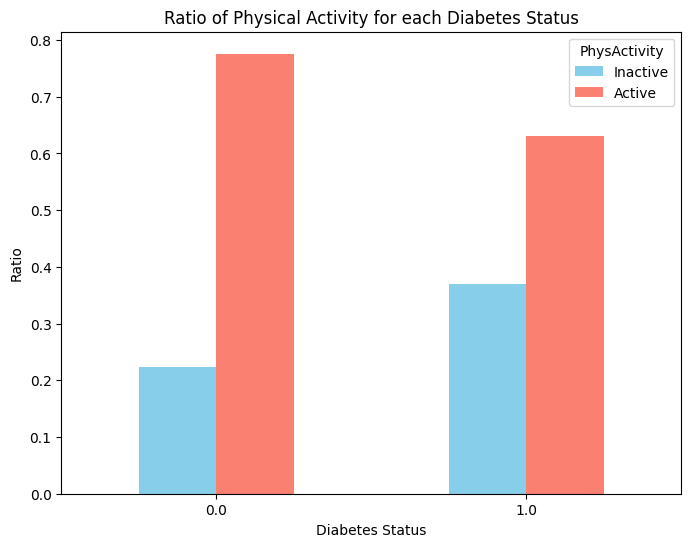

In [ ]:
# Calculate the ratio of PhysActivity for each Diabetes status
physactivity_diabetes_ratios = df.groupby(['Diabetes_binary', 'PhysActivity']).size().unstack().div(df['Diabetes_binary'].value_counts(), axis=0)

# Plotting the ratios
plt.figure(figsize=(8, 6))
physactivity_diabetes_ratios.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Ratio of Physical Activity for each Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.legend(['Inactive', 'Active'], title='PhysActivity', loc='upper right')
plt.show()


**Insights from Physical Activity (PhysActivity) and Diabetes Ratio Analysis:**

The ratio analysis of Physical Activity (PhysActivity) in relation to diabetes status reveals significant patterns:

1. **No Diabetes (Diabetes_binary = 0.0):**
   - Approximately 22.4% of individuals without diabetes are inactive (PhysActivity = 0.0), while 77.6% are active (PhysActivity = 1.0).

2. **Diabetes Present (Diabetes_binary = 1.0):**
   - Among individuals with diabetes, around 36.9% are inactive, while 63.1% are active.

**Key Observations:**
- Individuals without diabetes exhibit a higher proportion of physical activity, with 77.6% being active.
- In contrast, individuals with diabetes show a lower but still substantial proportion of physical activity, with 63.1% being active.


##### **Age vs Diabetes Status**

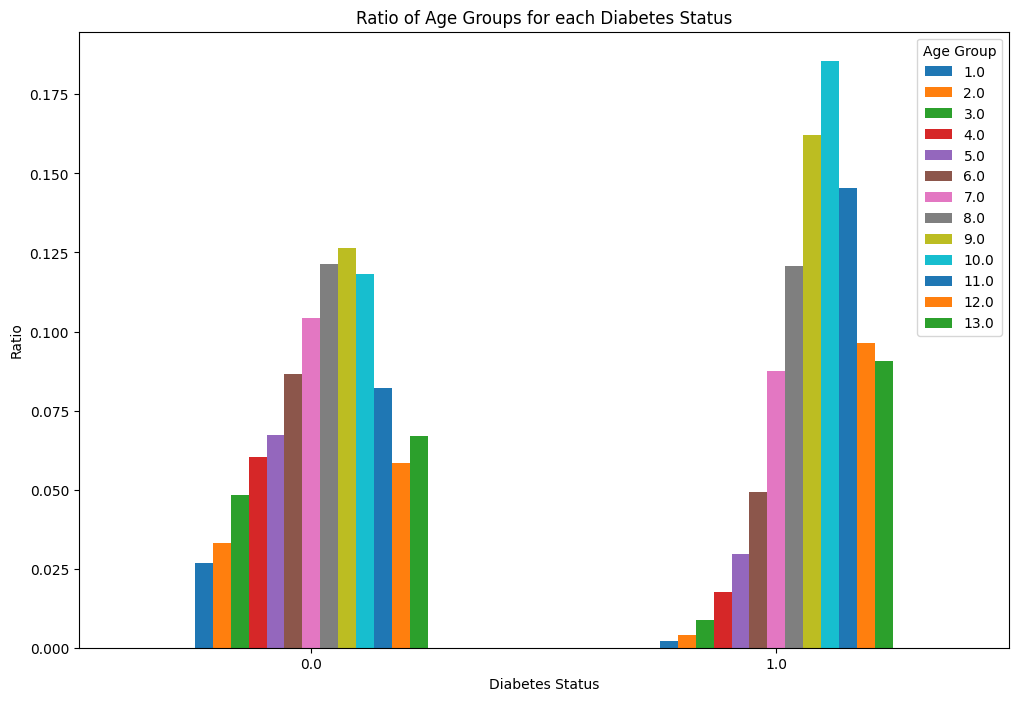

In [ ]:

# Calculate the ratio of each age group for each Diabetes status
age_diabetes_ratios = df.groupby(['Diabetes_binary', 'Age']).size().unstack().div(df['Diabetes_binary'].value_counts(), axis=0)

# Plotting the ratios
plt.figure(figsize=(12, 8))
age_diabetes_ratios.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Ratio of Age Groups for each Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Ratio')
plt.xticks(rotation=0)
plt.legend(title='Age Group', loc='upper right')
plt.show()

**Insights from Age Groups and Diabetes Ratio Analysis:**

The ratio analysis of age groups in relation to diabetes status provides valuable insights:

1. **No Diabetes (Diabetes_binary = 0.0):**
   - The majority of individuals without diabetes fall within the age groups 6.0 to 9.0 (60-79 years), with a peak in the 9.0 age group (70-79 years).
   - Individuals in the younger age groups (1.0 to 5.0) have lower representation, with the lowest ratio in age group 1.0 (18-29 years).

2. **Diabetes Present (Diabetes_binary = 1.0):**
   - Individuals with diabetes are distributed across a wider range of age groups, but there is a notable increase in the 9.0 age group (70-79 years).
   - The representation of individuals with diabetes is generally higher in older age groups (6.0 to 13.0).

**Key Observations:**
- The age distribution of individuals without diabetes is concentrated in the 60-79 years range.
- Individuals with diabetes show a broader age distribution, with a substantial representation in the 70-79 years age group.
- The ratio of individuals with diabetes increases with age, particularly in the 70-79 years age group.

This insight suggests that age is a significant factor in diabetes prevalence, and there is a higher likelihood of diabetes among individuals in older age groups.

## **Data Preparation and Model Training**

This section encompasses the partitioning of the data into training, testing, and validation sets. Additionally, it incorporates the application of standard scaling to normalize the data, ensuring uniformity for optimal generalization. The final steps involve model training and the assessment of predictive model performance.

In [ ]:
# splitting the data
train_data, temp_data = train_test_split(df, test_size=0.3, shuffle=True, random_state=0)
validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)
# printing the shape for each partition of the data
print(train_data.shape, test_data.shape, validation_data.shape)

(49484, 22) (10604, 22) (10604, 22)


**Separate the target variables from the other features for thr Train dataset, Validation dataset and Test dataset.**

In [ ]:
# Train Dataset
train_target = train_data['Diabetes_binary']
train_features = train_data.drop('Diabetes_binary', axis=1)

# Validation Dataset
validation_target = validation_data['Diabetes_binary']
validation_features = validation_data.drop('Diabetes_binary', axis=1)

# Test Dataset
test_target = test_data['Diabetes_binary']
test_features = test_data.drop('Diabetes_binary', axis=1)

In [ ]:
print(train_features.columns)

Index(['GenHlth', 'PhysHlth', 'MentHlth', 'AnyHealthcare', 'NoDocbcCost',
       'HighChol', 'Stroke', 'Sex', 'Education', 'Income', 'DiffWalk',
       'Smoker', 'HighBP', 'CholCheck', 'HeartDiseaseorAttack', 'Age', 'BMI',
       'HvyAlcoholConsump', 'Fruits', 'Veggies', 'PhysActivity'],
      dtype='object')


In [ ]:
# Create a pipeline for transforming numerical data
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

In [ ]:
num_attribs = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'Education', 'Income', 'PhysHlth']

other_attribs = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Income']

Full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("passthrough", "passthrough", other_attribs),
])

In [ ]:
train_sc_data = Full_pipeline.fit_transform(train_features)

validation_sc_tr_data = Full_pipeline.transform(validation_features)

test_sc_tr_data = Full_pipeline.transform(test_features)

#### Model Training and Evaluation

In [ ]:
# making a function for training and evaluating the model
def print_results(accuracy, parameters):
    print("Best Accuracy: {:.2f} %".format(accuracy * 100))
    print("Best Parameters:", parameters)
    print()

def evaluate_model(model, data, target, dataset_name):
    prediction = model.predict(data)
    cm = confusion_matrix(target, prediction)
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction)
    recall = recall_score(target, prediction)
    f1 = f1_score(target, prediction)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Printing other metrics
    print(f"{dataset_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print()


# function to plot confusion matrix of each model performance
def plot_confusion_matrices(cm1, cm2, title1, title2):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Plotting the first confusion matrix
    sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax[0])
    ax[0].set_title(title1)
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')

    # Plotting the second confusion matrix
    sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", ax=ax[1])
    ax[1].set_title(title2)
    ax[1].set_ylabel('True label')
    ax[1].set_xlabel('Predicted label')

    plt.show()



#### **Linear Regression**

Best Accuracy: 74.41 %
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'C': 0.5}



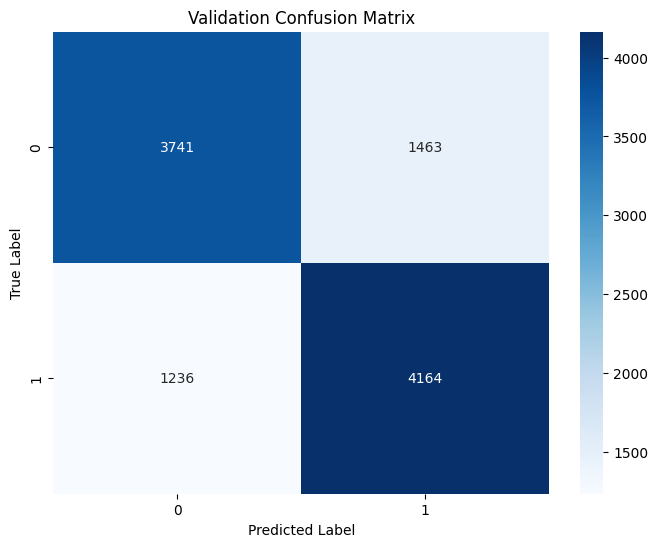

Validation Metrics:
Accuracy: 0.745473406261788
Precision: 0.7400035542918073
Recall: 0.7711111111111111
F1 Score: 0.7552371451890814



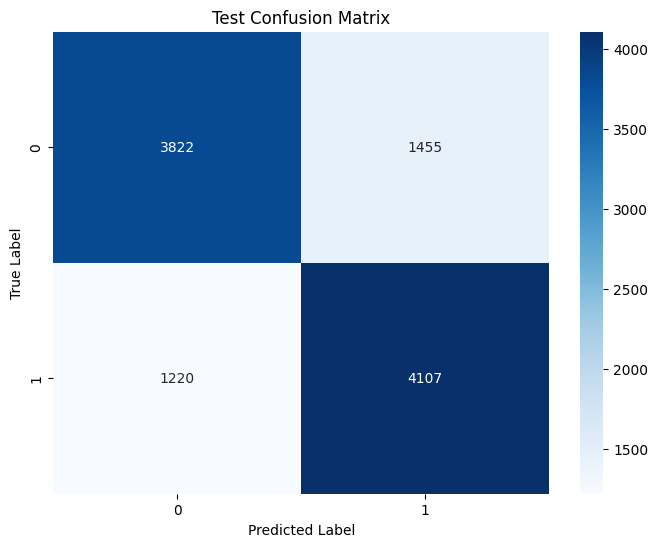

Test Metrics:
Accuracy: 0.747736703130894
Precision: 0.738403451995685
Recall: 0.7709780364182467
F1 Score: 0.7543392414363119



In [ ]:
# intializing the linear Regression model
LR_classifier = LogisticRegression()

# defining the Linear Regression parameters

LR_parameters = {
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.50, 1.75],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # 'saga' works with both l1 and l2
    'max_iter': [1000, 2000, 3000]  # Increase max iterations
}


# Set up RandomizedSearchCV
LR_rand_search = RandomizedSearchCV(
    estimator=LR_classifier,
    param_distributions=LR_parameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Train the model
LR_rand_search.fit(train_sc_data, train_target)

# Retrieve the best accuracy and best parameters
LR_best_accuracy = LR_rand_search.best_score_
LR_best_parameters = LR_rand_search.best_params_

# Print the results
print_results(LR_best_accuracy, LR_best_parameters)

# Use the best model for validation and test datasets
evaluate_model(LR_rand_search.best_estimator_, validation_sc_tr_data, validation_target, "Validation")
evaluate_model(LR_rand_search.best_estimator_, test_sc_tr_data, test_target, "Test")

#### **K-Nearest Neighbour Classifier**

Best Accuracy: 73.22 %
Best Parameters: {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'manhattan'}



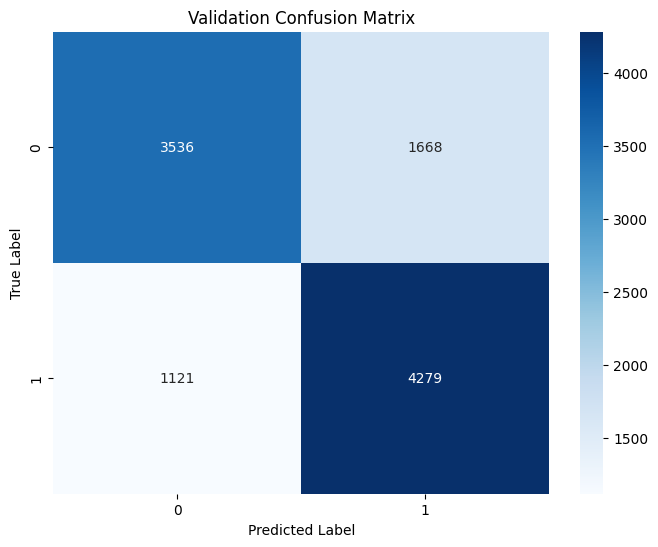

Validation Metrics:
Accuracy: 0.7369860430026405
Precision: 0.7195224482932571
Recall: 0.7924074074074074
F1 Score: 0.7542081607473342



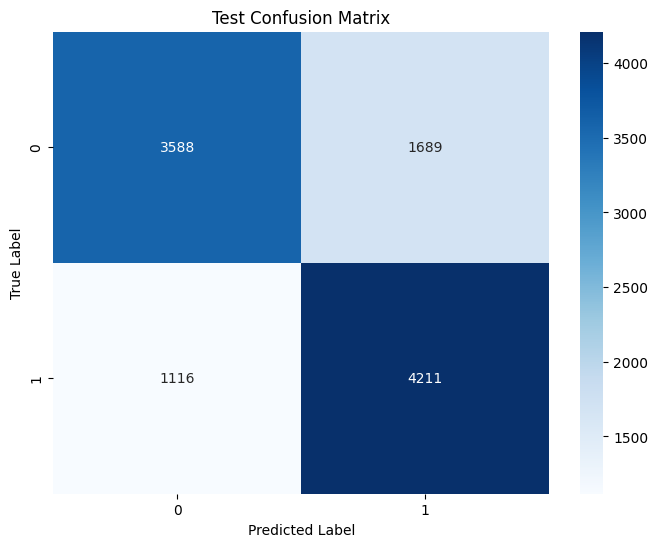

Test Metrics:
Accuracy: 0.7354771784232366
Precision: 0.713728813559322
Recall: 0.7905012201989863
F1 Score: 0.7501558742317627



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initializing the KNN model
KNN_classifier = KNeighborsClassifier()

# Defining the KNN parameters
KNN_parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up RandomizedSearchCV
KNN_rand_search = RandomizedSearchCV(
    estimator=KNN_classifier,
    param_distributions=KNN_parameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Train the model
KNN_rand_search.fit(train_sc_data, train_target)

# Retrieve the best accuracy and best parameters
KNN_best_accuracy = KNN_rand_search.best_score_
KNN_best_parameters = KNN_rand_search.best_params_

# Print the results
print_results(KNN_best_accuracy, KNN_best_parameters)

# Use the best model for validation and test datasets
evaluate_model(KNN_rand_search.best_estimator_, validation_sc_tr_data, validation_target, "Validation")
evaluate_model(KNN_rand_search.best_estimator_, test_sc_tr_data, test_target, "Test")


##### **Gaussian Naive Bayes**

Best Accuracy: 71.25 %
Best Parameters: {'var_smoothing': 0.0001}



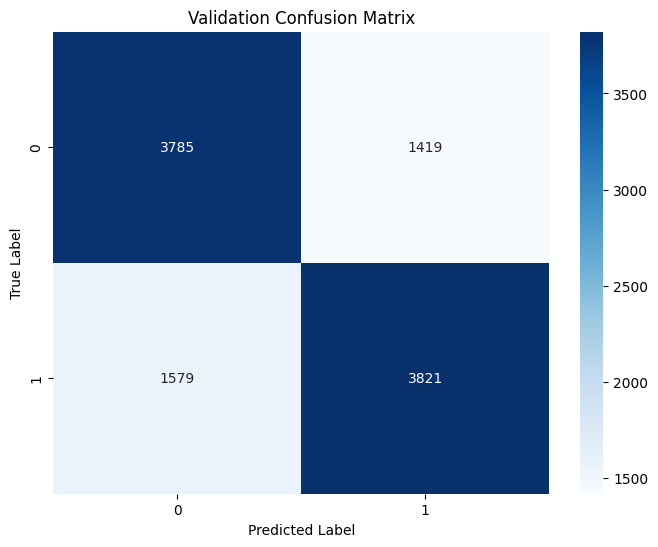

Validation Metrics:
Accuracy: 0.7172764994341758
Precision: 0.7291984732824427
Recall: 0.7075925925925926
F1 Score: 0.718233082706767



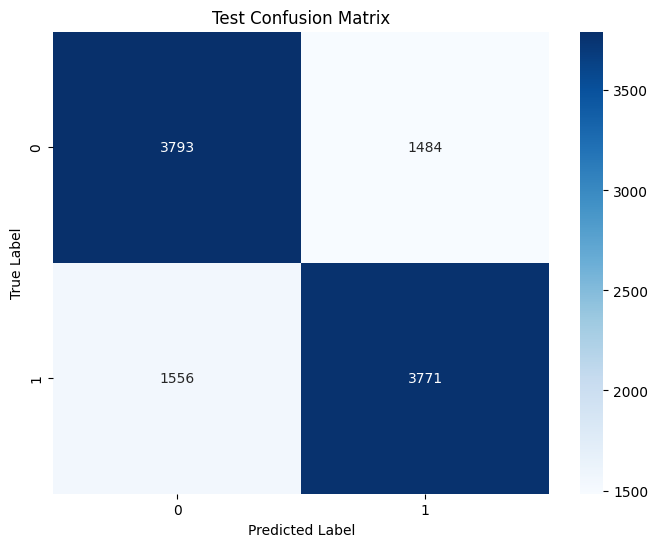

Test Metrics:
Accuracy: 0.7133157299132403
Precision: 0.7176022835394862
Recall: 0.7079031349727801
F1 Score: 0.7127197127197127



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

# Initializing the KNN model
GNB_classifier = GaussianNB()

# Defining the KNN parameters
GNB_parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Set up RandomizedSearchCV
GNB_rand_search = RandomizedSearchCV(
    estimator=GNB_classifier,
    param_distributions=GNB_parameters,
    scoring='accuracy',
    n_iter=9,
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Train the model
GNB_rand_search.fit(train_sc_data, train_target)

# Retrieve the best accuracy and best parameters
GNB_best_accuracy = GNB_rand_search.best_score_
GNB_best_parameters = GNB_rand_search.best_params_

# Print the results
print_results(GNB_best_accuracy, GNB_best_parameters)

# Use the best model for validation and test datasets
evaluate_model(GNB_rand_search.best_estimator_, validation_sc_tr_data, validation_target, "Validation")
evaluate_model(GNB_rand_search.best_estimator_, test_sc_tr_data, test_target, "Test")


#### **Random Forest**

Best Accuracy: 74.74 %
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}



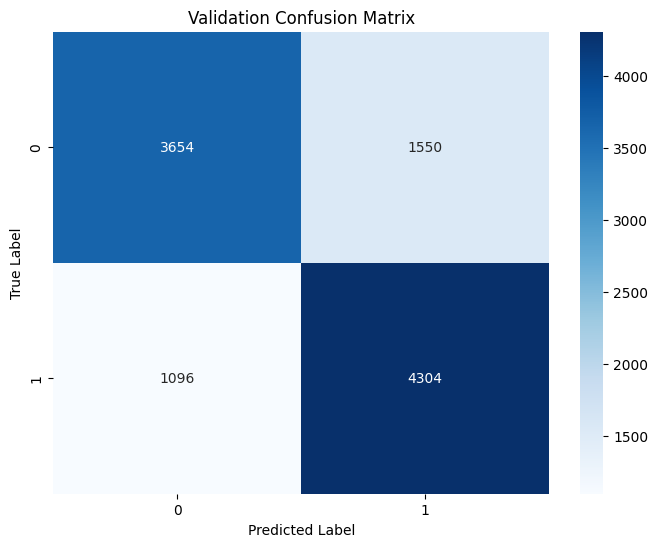

Validation Metrics:
Accuracy: 0.7504715201810638
Precision: 0.7352237786129142
Recall: 0.797037037037037
F1 Score: 0.764883596943309



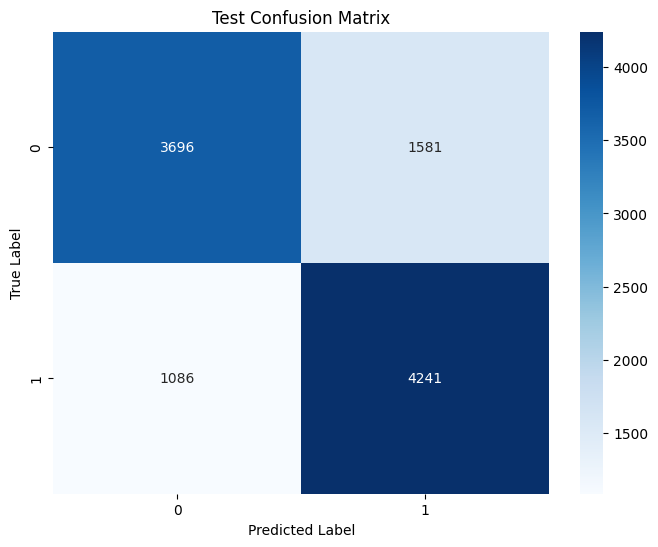

Test Metrics:
Accuracy: 0.748491135420596
Precision: 0.728443833734112
Recall: 0.7961329078280458
F1 Score: 0.7607857206924389



In [ ]:
# Initializing the Random Forest model
RF_classifier = RandomForestClassifier()

# Defining the Random Forest parameters
RF_parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
RF_rand_search = RandomizedSearchCV(
    estimator=RF_classifier,
    param_distributions=RF_parameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Train the model
RF_rand_search.fit(train_sc_data, train_target)

# Retrieve the best accuracy and best parameters
RF_best_accuracy = RF_rand_search.best_score_
RF_best_parameters = RF_rand_search.best_params_

# Print the results
print_results(RF_best_accuracy, RF_best_parameters)

# Use the best model for validation and test datasets
evaluate_model(RF_rand_search.best_estimator_, validation_sc_tr_data, validation_target, "Validation")
evaluate_model(RF_rand_search.best_estimator_, test_sc_tr_data, test_target, "Test")


#### **XGBoost**



Best Accuracy: 74.94 %
Best Parameters: {'subsample': 1, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}



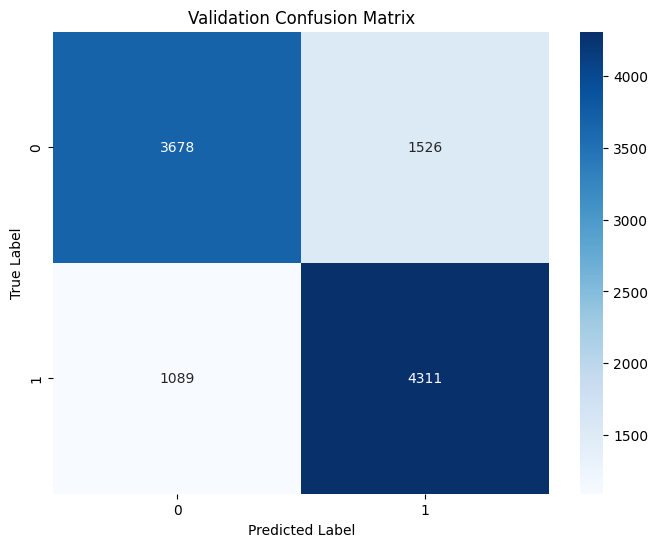

Validation Metrics:
Accuracy: 0.753394945303659
Precision: 0.738564330991948
Recall: 0.7983333333333333
F1 Score: 0.7672866423422623



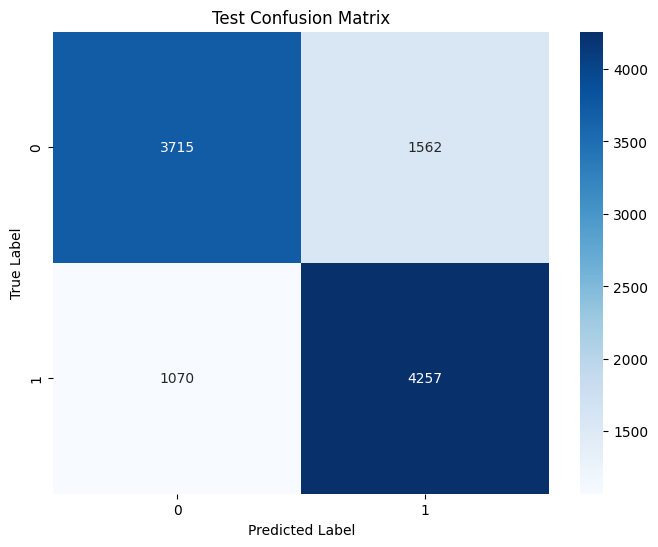

Test Metrics:
Accuracy: 0.7517917766880422
Precision: 0.7315689981096408
Recall: 0.7991364745635442
F1 Score: 0.7638614749685986



In [ ]:
# Initializing the XGBoost model
XGB_classifier = XGBClassifier()

# Defining the XGBoost parameters
XGB_parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.5, 0.7, 0.9, 1],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

# Set up RandomizedSearchCV
XGB_rand_search = RandomizedSearchCV(
    estimator=XGB_classifier,
    param_distributions=XGB_parameters,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Train the model
XGB_rand_search.fit(train_sc_data, train_target)

# Retrieve the best accuracy and best parameters
XGB_best_accuracy = XGB_rand_search.best_score_
XGB_best_parameters = XGB_rand_search.best_params_

# Print the results
print_results(XGB_best_accuracy, XGB_best_parameters)

# Use the best model for validation and test datasets
evaluate_model(XGB_rand_search.best_estimator_, validation_sc_tr_data, validation_target, "Validation")
evaluate_model(XGB_rand_search.best_estimator_, test_sc_tr_data, test_target, "Test")
